## Addressing RQ 2
_Spatial interactions in adoption of BEVs_

In [247]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [248]:
case_study_name = "cs_2025-04-09_09-28-56"
input_file_name = "transport_data_years_v87_distributed_expansion.yaml"

current_path = os.getcwd()
print("Current path:", current_path)
file_results = os.path.normpath(current_path + "/results")
print("File results:", os.path.normpath(file_results))
file_path = os.path.join(current_path, "/results")
print(file_path)
# Normalize the path
normalized_path = os.path.normpath(file_path)
print("Normalized path:", normalized_path)

Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [249]:
folder_input = os.path.normpath(current_path + "/data")
with open(folder_input + "/" + input_file_name) as file:
    input_data = yaml.safe_load(file)

In [250]:
# with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
#     n_fueling_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    budget_penalty_minus_dict = yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    budget_penalty_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
    budget_penalty_plus_yearly_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
    budget_penalty_minus_yearly_dict= yaml.safe_load(file)
# with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
#     detour_time_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    f_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
    h_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    h_exist_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    h_minus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    h_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
    q_fuel_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    q_mode_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
    s_dict= yaml.safe_load(file)


In [251]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested 
    tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e



budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
budget_penalty_plus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_plus_yearly_dict.items()}
budget_penalty_minus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_minus_yearly_dict.items()}
#detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
f = {process_key(key): process_value(value) for key, value in f_dict.items()}
h = {process_key(key): process_value(value) for key, value in h_dict.items()}
h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
s = {process_key(key): process_value(value) for key, value in s_dict.items()}
# n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}

In [252]:
print(input_data.keys())
model_parameters = input_data["Model"]
print(model_parameters)

Y = model_parameters["Y"]
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1

dict_keys(['DetourTimeReduction', 'Edge', 'FinancialStatus', 'Fuel', 'GeographicElement', 'InitDetourTime', 'InitialFuelingInfr', 'InitialModeInfr', 'InitialVehicleStock', 'Initial_Mode_Share', 'Market_shares', 'Mode', 'Model', 'Node', 'Odpair', 'Path', 'Product', 'Regiontype', 'Speed', 'TechVehicle', 'Technology', 'Vehicletype'])
{'E': 12, 'N': 2, 'Y': 31, 'budget_penalty_minus': 1000000, 'budget_penalty_plus': 1000000, 'budget_penalty_yearly_minus': 1000000, 'budget_penalty_yearly_plus': 1000000, 'discount_rate': 0.05, 'gamma': 0.0003, 'goals_no_new_ICEV': {2035: 0.0}, 'goals_tot_BEV': {2030: 230.0}, 'investment_period': 5, 'pre_y': 25, 'y_init': 2020}


### Filtering for communting trips 
trip purpose? + origin/destination

In [253]:
# commuting_ids

commuting_ids_df = pd.read_csv(os.path.normpath(folder_input + "/interregional_commuting.csv"))
commuting_ids = set(commuting_ids_df["commuting_ids"].tolist())
print(commuting_ids_df.head())
# selecting the ids that are traveling between the boarders 


   commuting_ids
0             22
1             23
2             24
3             25
4             26


In [254]:
# print(input_data.keys())
fuel_list = input_data["Fuel"]
mode_list = input_data["Mode"]
techvehicle_list = input_data["TechVehicle"]
odpair_list = input_data["Odpair"]  
financial_status_list = input_data["FinancialStatus"]

od_pair_list_by_year = {}
for y in range(y_init, Y_end + 1):

    od_pair_list_by_year[y] = sum(odpair_list[r]["F"][y - y_init] for r in range(0, len(odpair_list)))


fuel_list = {item["id"]: item for item in fuel_list}
mode_list = {item["id"]: item for item in mode_list}
techvehicle_list = {item["id"]: item for item in techvehicle_list}
odpair_list = {item["id"]: item for item in odpair_list}
financial_status_list = {item["id"]: item for item in financial_status_list}

# calculating for each technology and each year the total cost
def get_vehicle_stock(by_income_class = False, income_class=None, select_by_od_pair=False, selected_od_pair=[]):
    techveh_stock = {}

    for tv_id in techvehicle_list:

        for y in range(y_init, Y_end + 1):
            if not by_income_class and not select_by_od_pair:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r, tv_id, g) in h.keys())
            elif select_by_od_pair and not by_income_class:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair if (y, r, tv_id, g) in h.keys())
            elif by_income_class and not select_by_od_pair:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            else:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            techveh_stock[(y, tv_id)] = total_veh_number
    return techveh_stock

In [255]:
colors_techvehicles = ["#f7b267", "#76c893", "#c0b9dd", "#4f5d75", "#c9ada7", "#9a8c98", "#8e9aaf", "#8b8c89", "#463f3a", "#595959", "#604d53"]

### displaying the tech shift

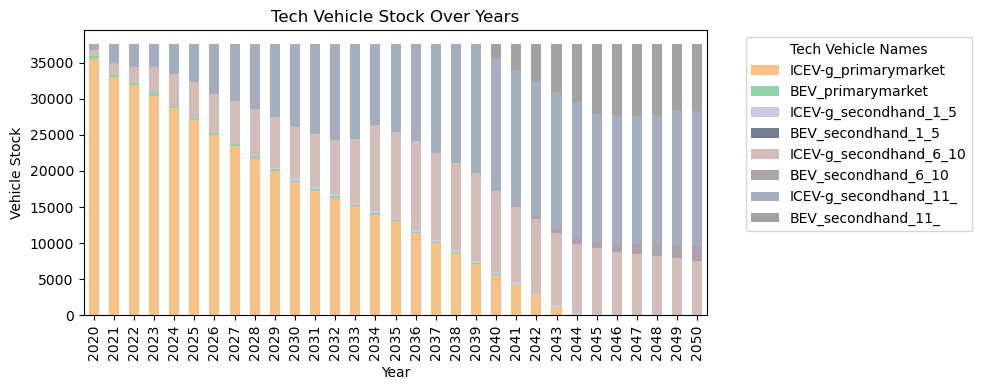

In [256]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
tech_ids = list(techvehicle_list.keys())

# techveh_stock_all = get_vehicle_stock(select_by_od_pair=True, selected_od_pair=commuting_ids)
l =  [22, 23, 24, 25, 26, 81, 82, 83, 84, 85]
techveh_stock_all = get_vehicle_stock(select_by_od_pair=True, selected_od_pair=l)

# Prepare data for stacked bar plot
data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Stock')
ax.set_title('Tech Vehicle Stock Over Years')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.legend(title='Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


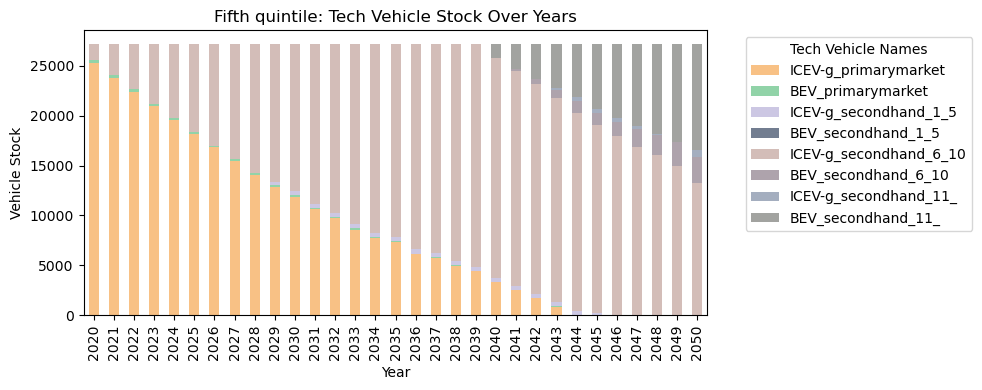

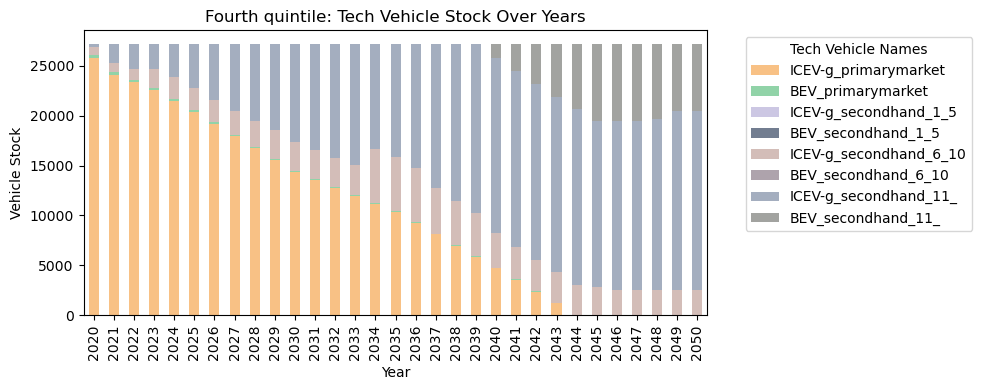

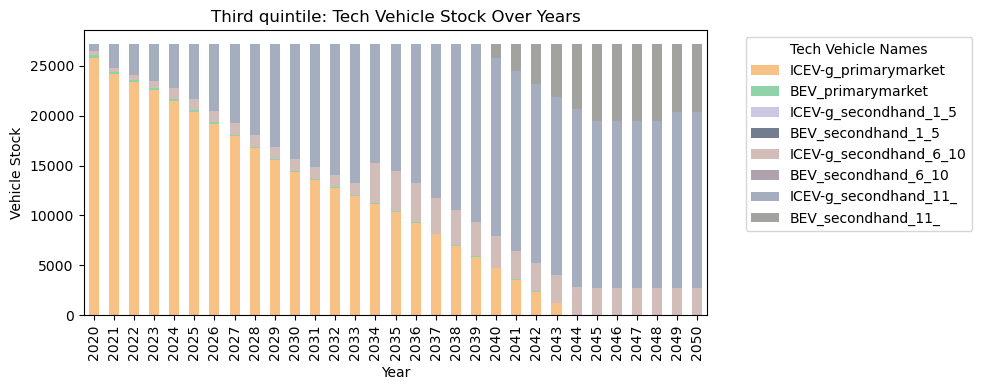

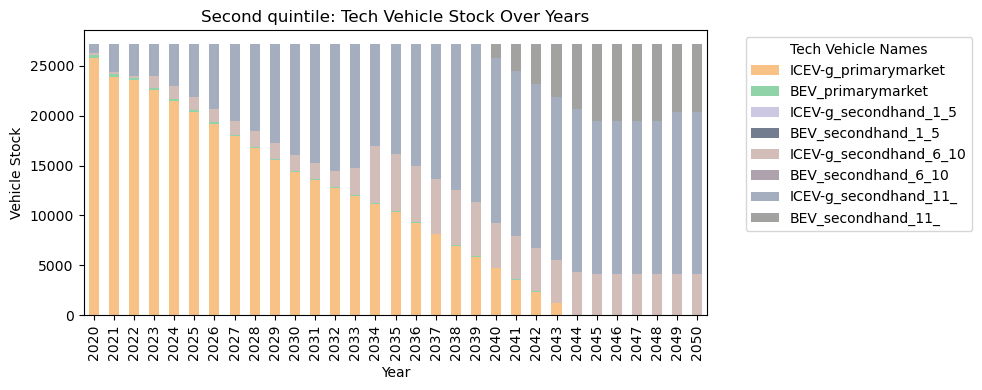

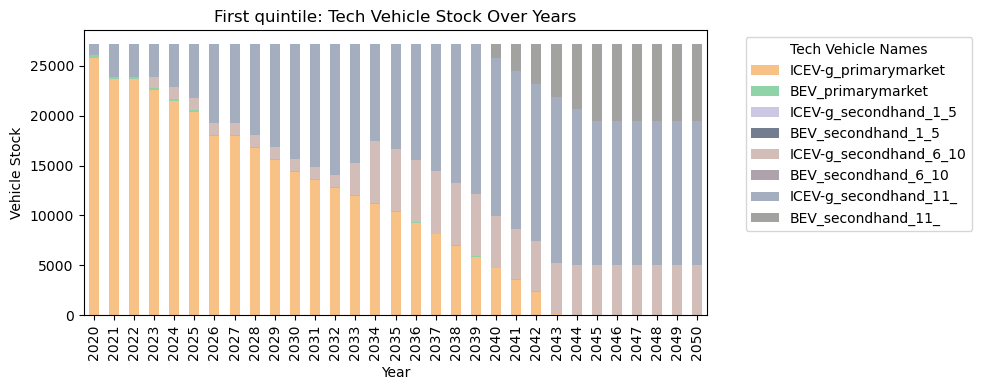

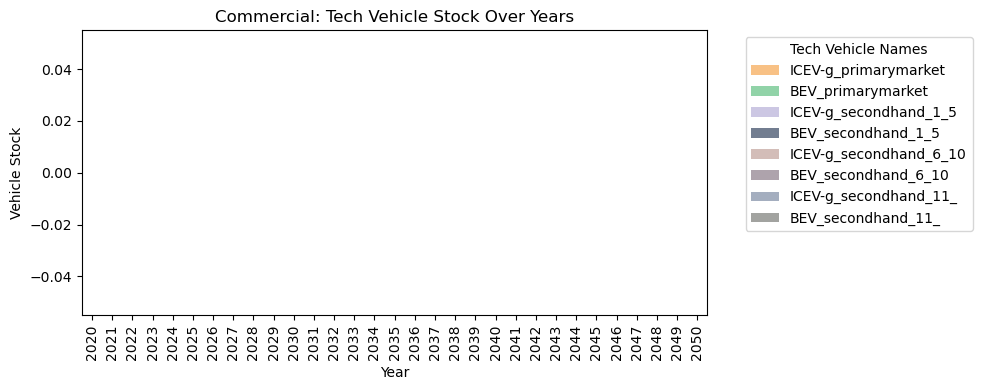

In [257]:
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_vehicle_stock(by_income_class=True, income_class=financial_status_list[fin]["name"], select_by_od_pair=True, selected_od_pair=commuting_ids)

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicle Stock')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)


### displaying infrastructure dev 

In [258]:
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

fuel_list = input_data["Fuel"]
fuel_list = {item["id"]: item for item in fuel_list}

def get_fuel_infr_plus(by_geographic_element = False, geographic_element=[]):
    q_plus_by_tech = {}

    if not by_geographic_element:
        geographic_element = geographic_element_list.keys()
    
    for f in fuel_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y0, f, e)] for y0 in range(y_init, y+1) for e in geographic_element if (y0, f, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, f)] = total_expansion_per_y
    return q_plus_by_tech

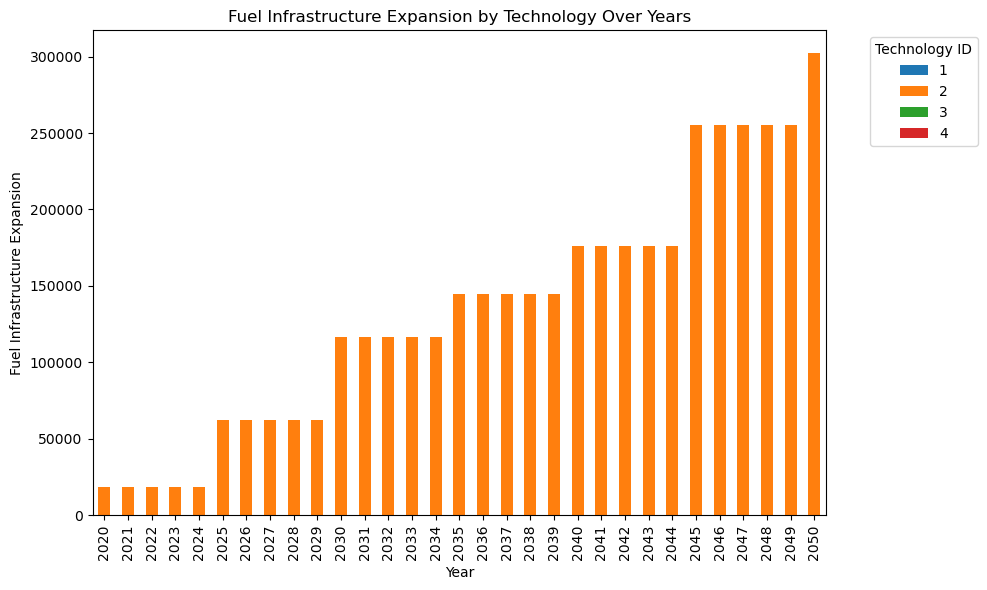

In [259]:
q_plus_by_tech = get_fuel_infr_plus()

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(technology_list.keys())

# Prepare data for stacked bar plot
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fuel Infrastructure Expansion')
ax.set_title('Fuel Infrastructure Expansion by Technology Over Years')
plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

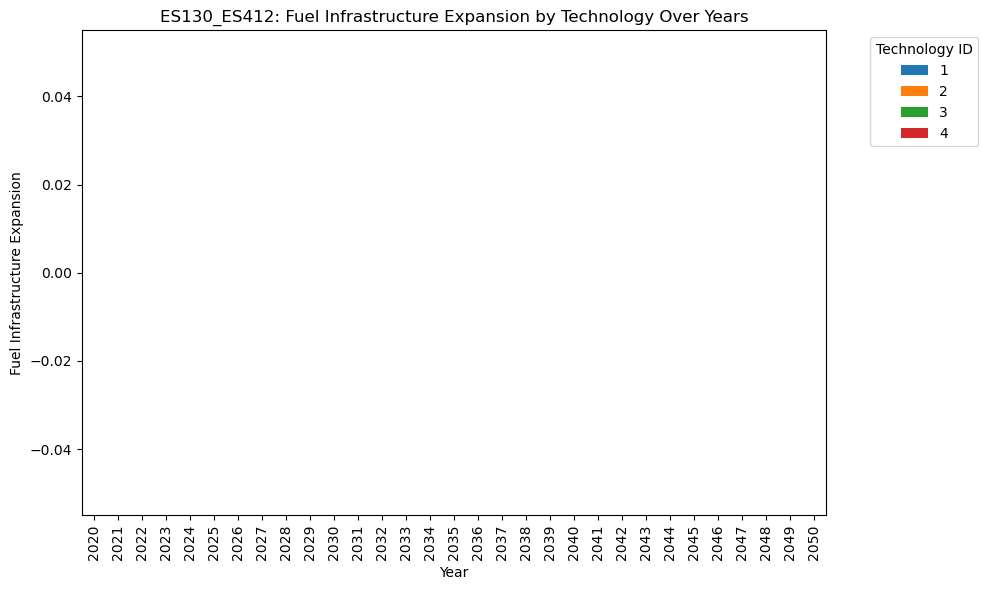

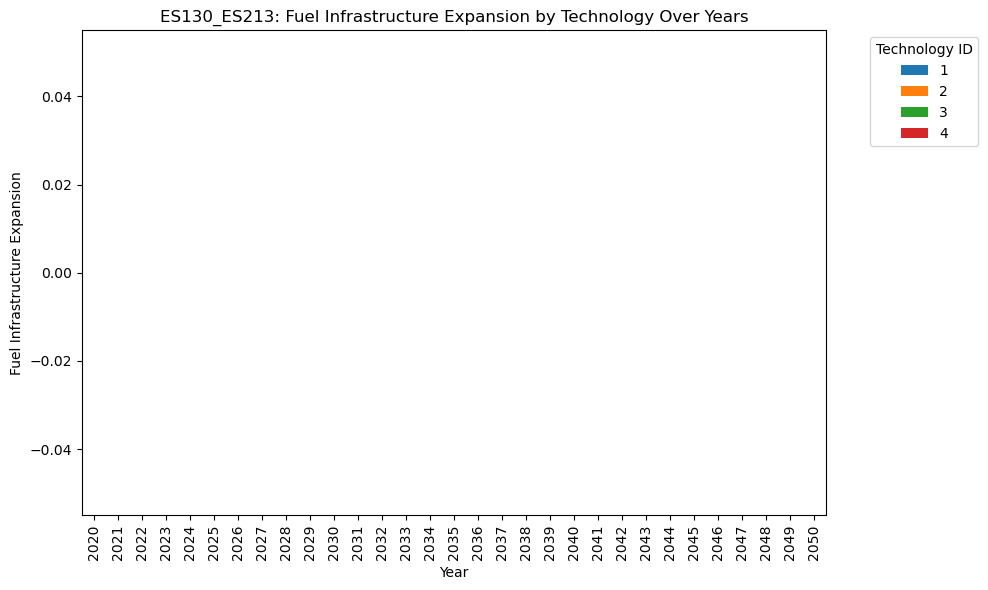

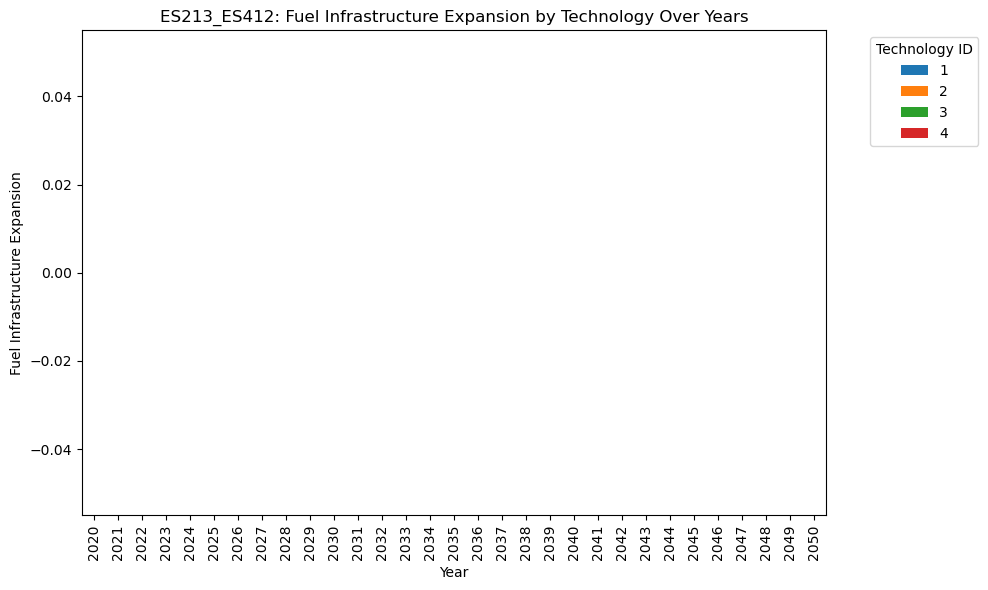

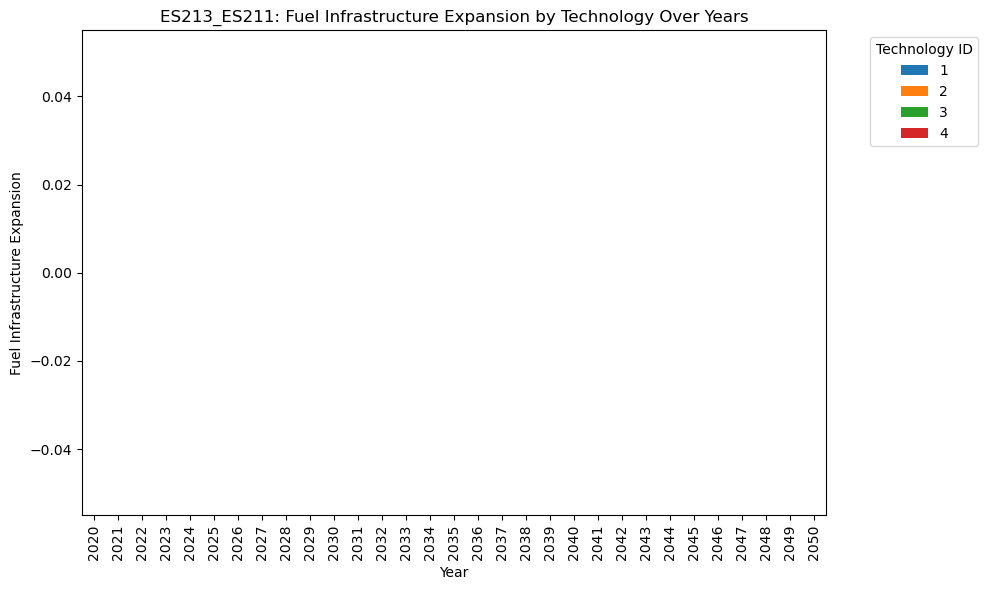

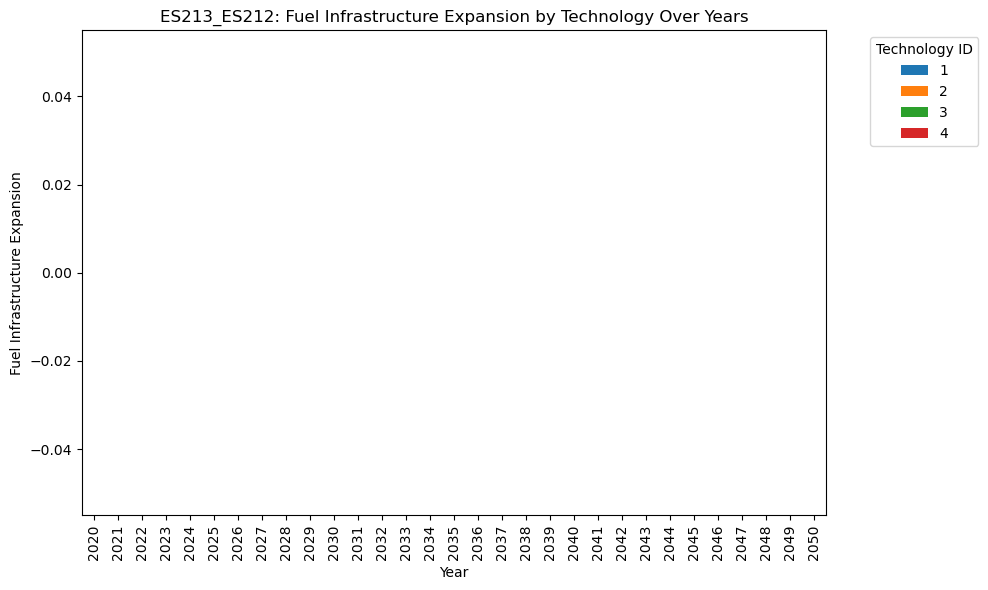

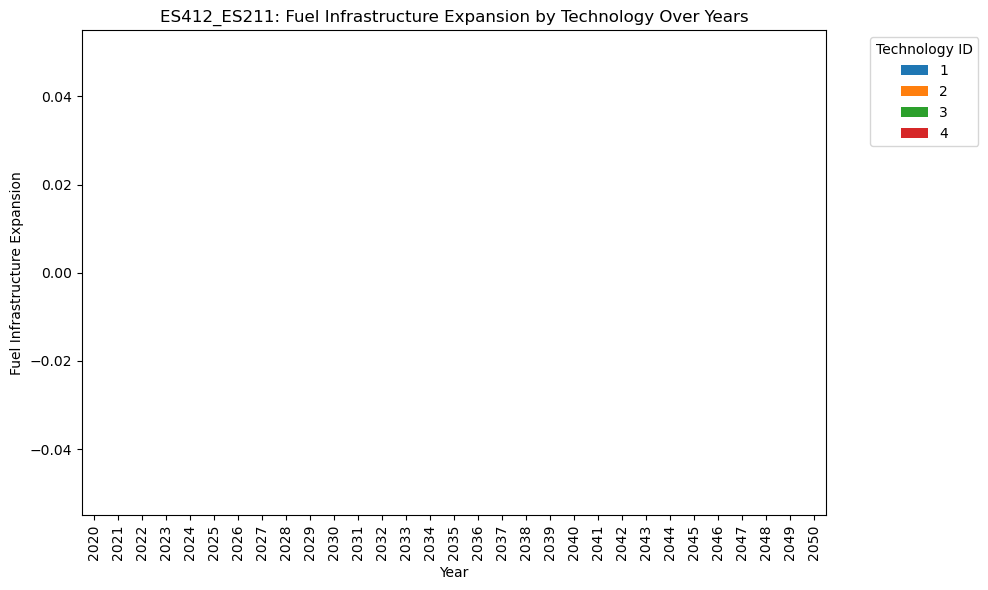

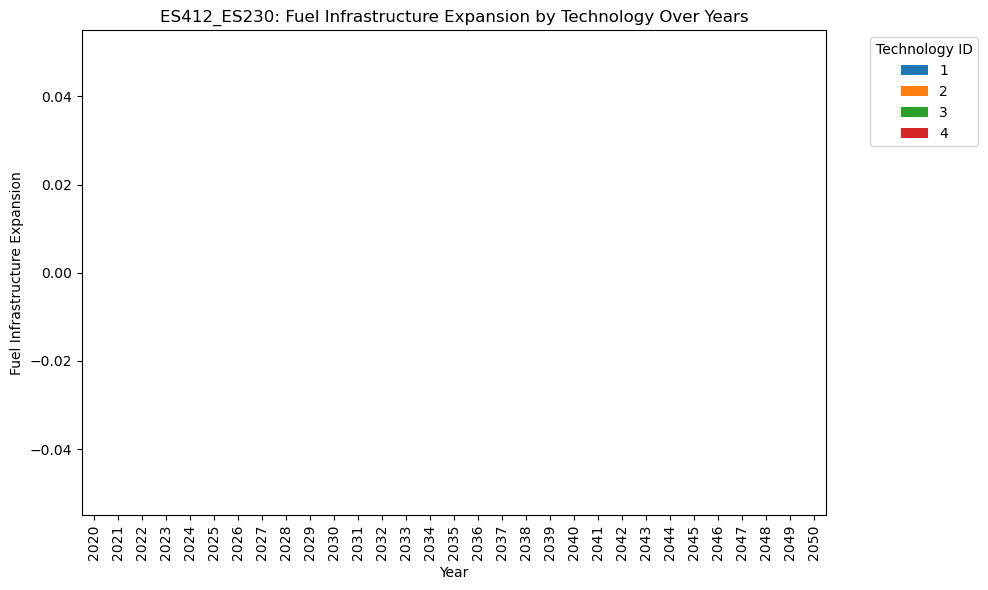

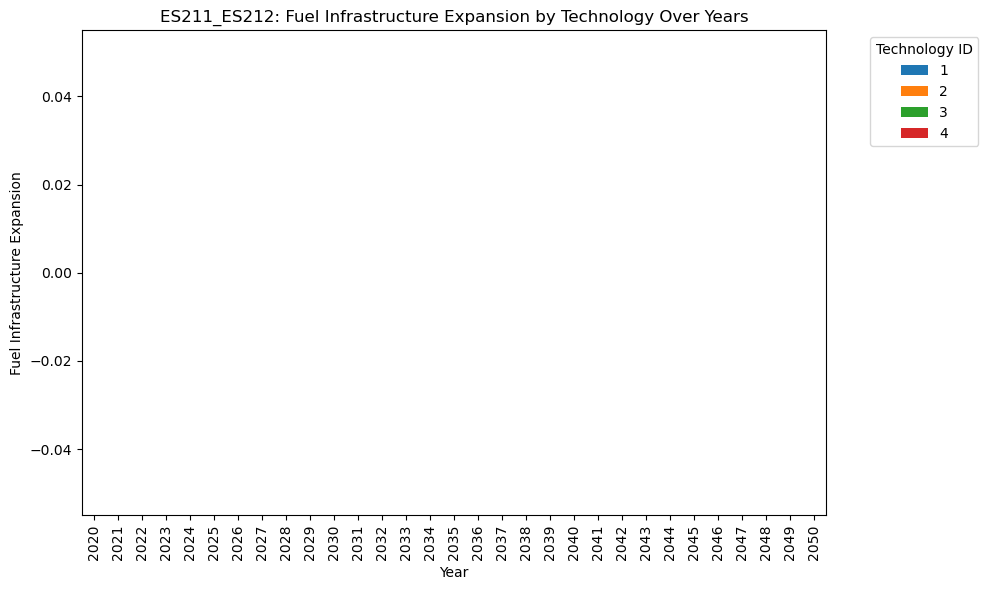

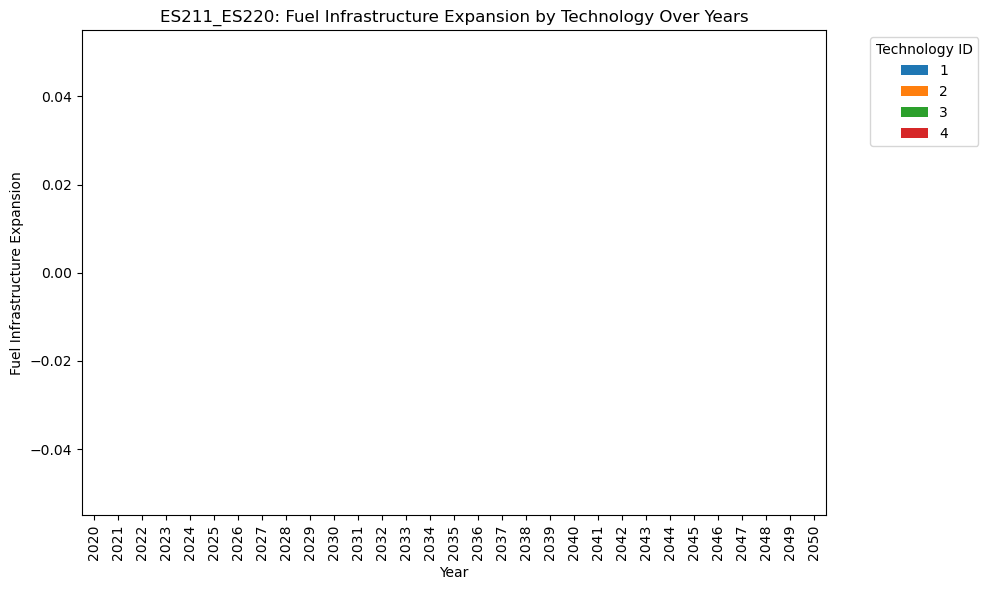

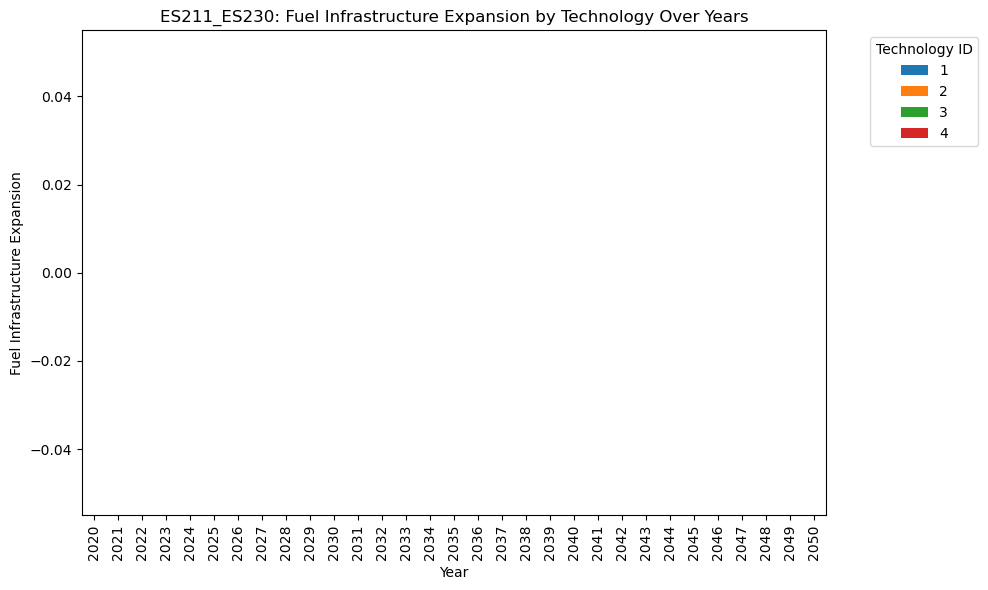

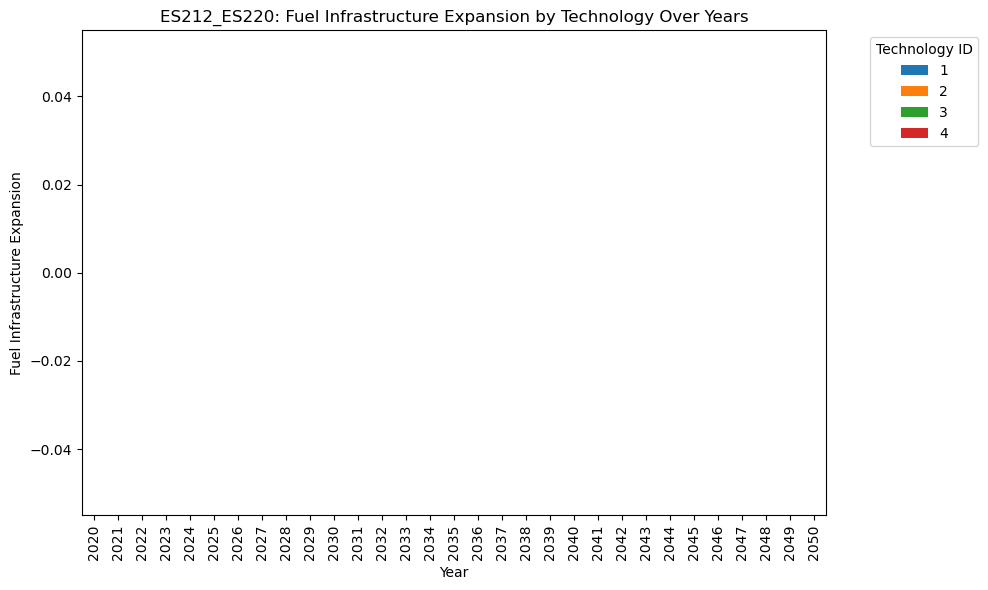

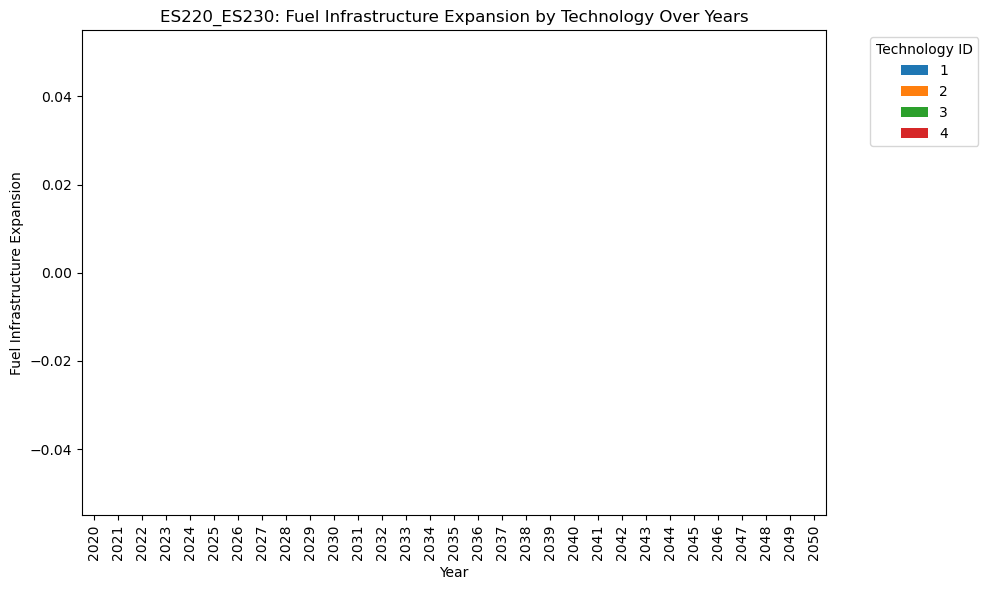

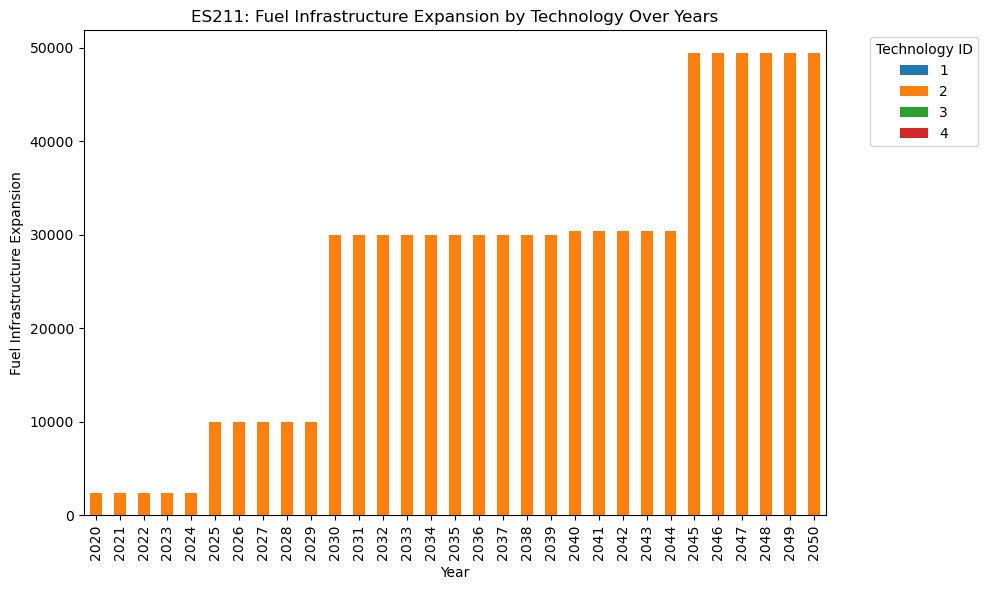

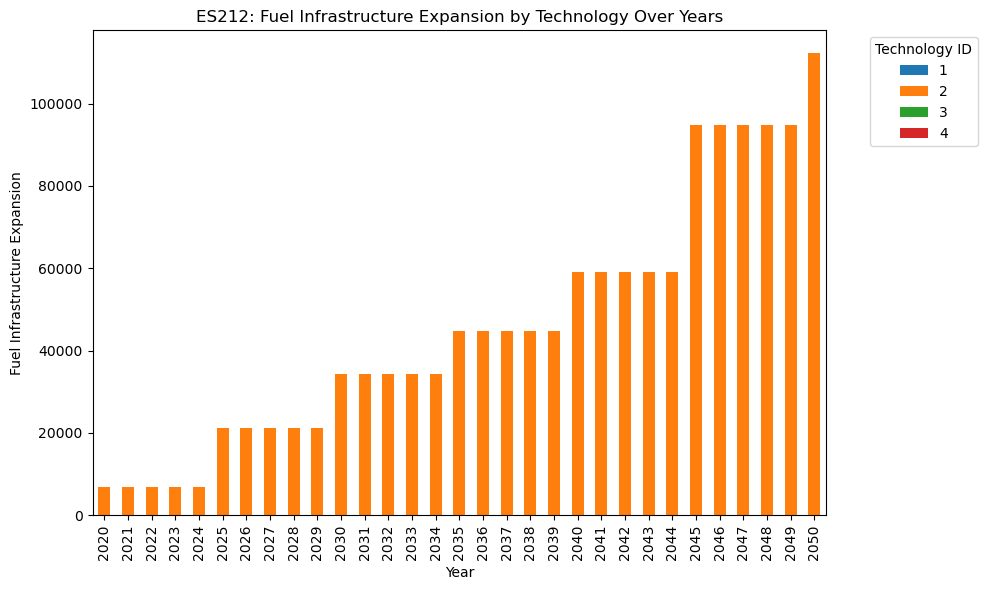

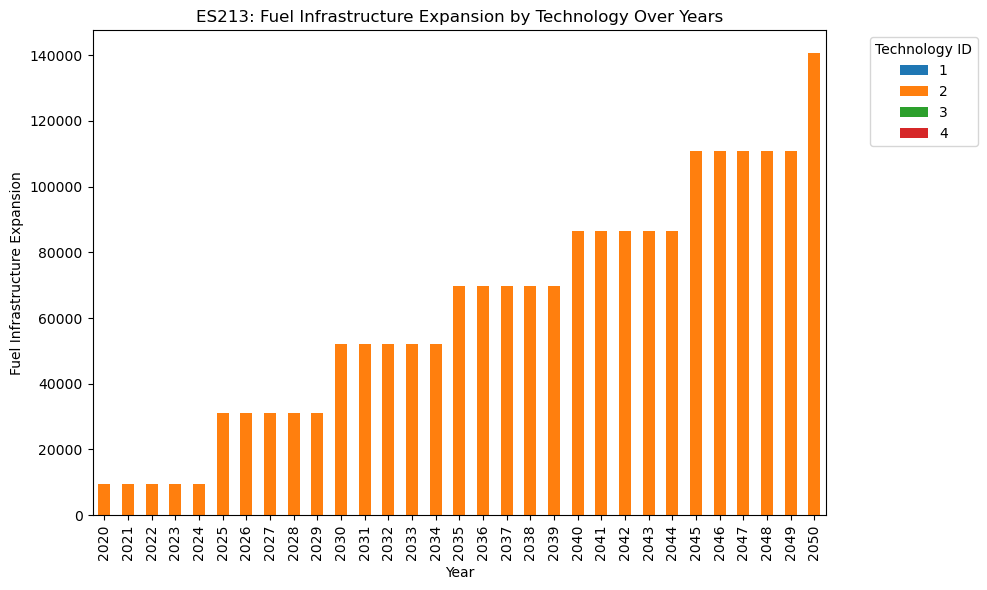

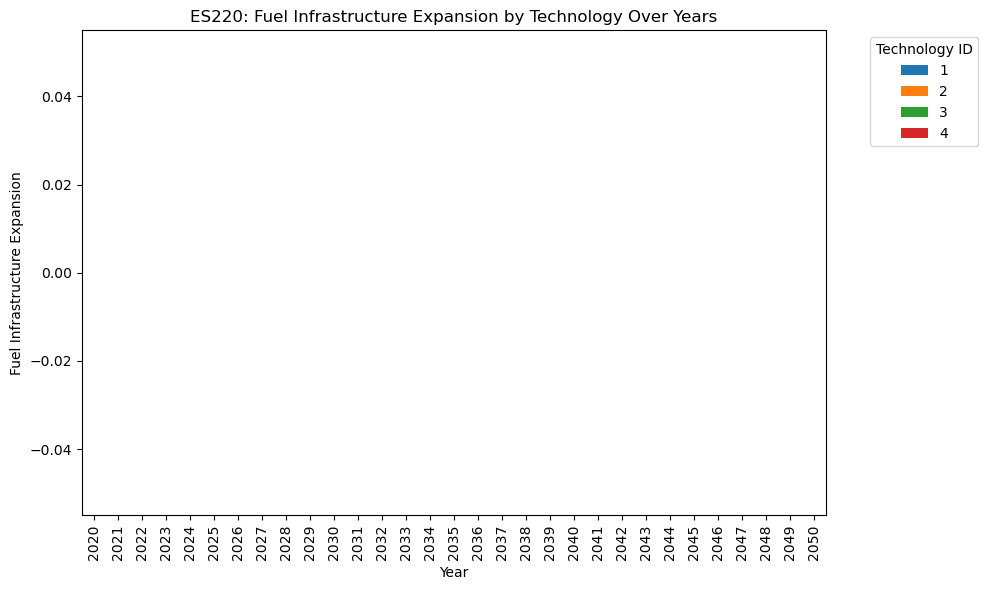

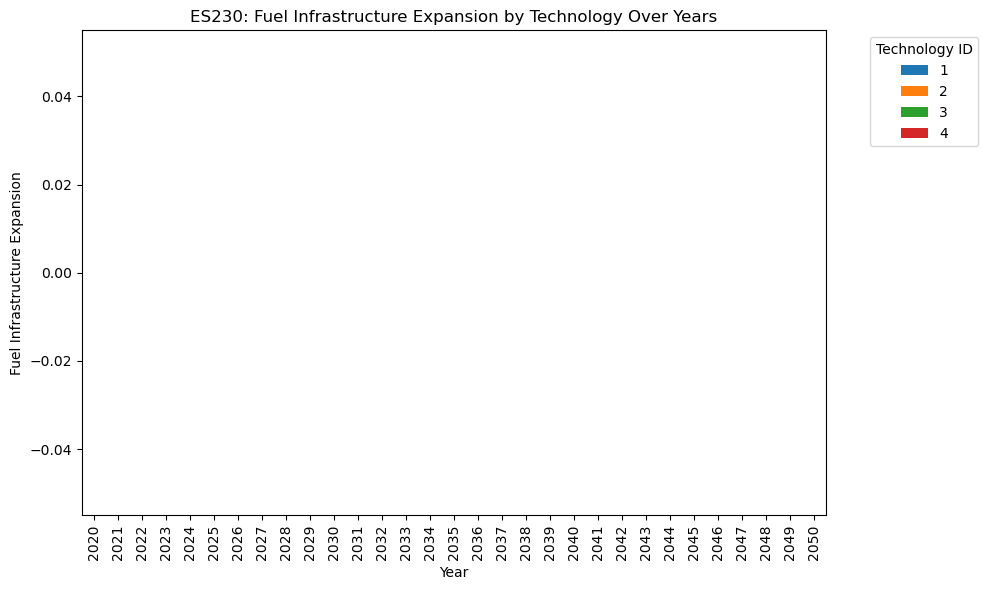

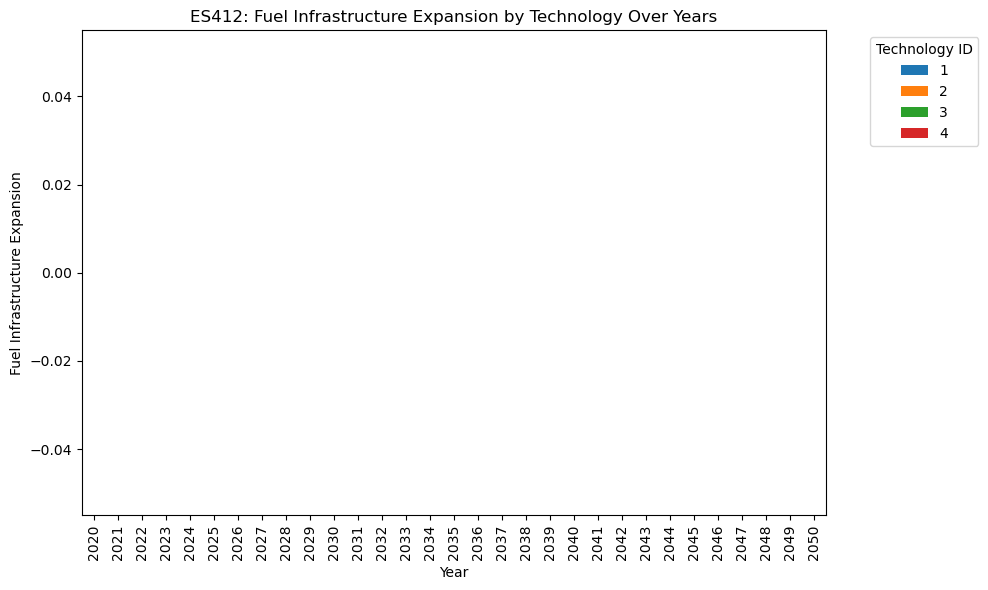

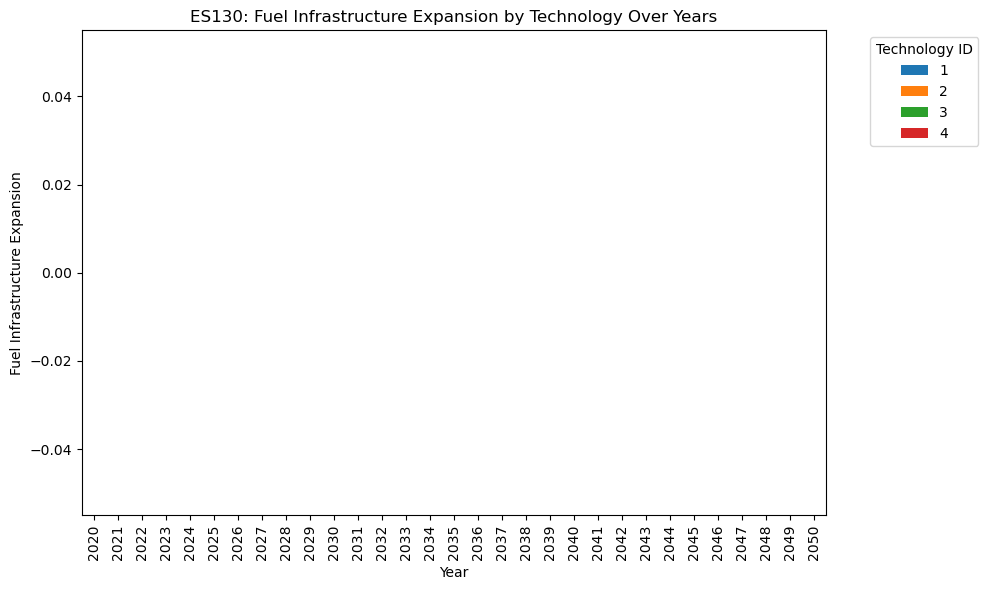

In [260]:
# for each geom_item

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}

for e in geographic_element_list.keys():
    q_plus_by_tech = get_fuel_infr_plus(True, [e])

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    tech_ids = list(technology_list.keys())

    # Prepare data for stacked bar plot
    data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Fuel Infrastructure Expansion')
    ax.set_title(str(geographic_element_list[e]["name"]) + ': Fuel Infrastructure Expansion by Technology Over Years')
    plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### origin vs. destination charging         

In [261]:
product_list = input_data["Product"]
odpair_list = input_data["Odpair"]
path_list = input_data["Path"]
techvehicle_list = input_data["TechVehicle"]
fuel_list = input_data["Fuel"]
geometric_element_list = input_data["GeographicElement"]
technology_list = input_data["Technology"]
mode_list = input_data["Mode"]
financial_status = input_data["FinancialStatus"]
speed_list = input_data["Speed"]
vehicle_list = input_data["Vehicletype"]

odpair_list_dict = {item["id"]: item for item in odpair_list}
techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
product_list_dict = {item["id"]: item for item in product_list}
path_list_dict = {item["id"]: item for item in path_list}
fuel_list_dict = {item["id"]: item for item in fuel_list}
geometric_element_list_dict = {item["id"]: item for item in geometric_element_list}
technology_list_dict = {item["id"]: item for item in technology_list}
mode_list_dict = {item["id"]: item for item in mode_list}
financial_status_dict = {item["id"]: item for item in financial_status}
speed_list_dict = {item["region_type"]: item for item in speed_list}
vehicle_list_dict = {item["name"]: item for item in vehicle_list}

def get_fueling_activity(filtering_od_ids=False, selected_od_pairs=[], by_origin=False, origin=None, by_fuel=False, fuel=None):
    if filtering_od_ids:
        od_pair_ids = selected_od_pairs
    else:
        od_pair_ids = list(odpair_list.keys())

    origin_fueling = 0
    destination_fueling = 0

    for r in od_pair_ids:
        orig = odpair_list_dict[r]["from"]
        if by_origin:
            if orig != origin:
                continue
        print(orig, r)
        dest = odpair_list_dict[r]["to"]
        for y in range(y_init, Y_end + 1):
            if by_fuel:
                orig_fueling= sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id) in s.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel)
                dest_fueling = sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id) in s.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel)
            else:
                orig_fueling= sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id) in s.keys())
                dest_fueling = sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id) in s.keys())
 
            origin_fueling += orig_fueling
            destination_fueling += dest_fueling
    return origin_fueling, destination_fueling

13 130
13 131
13 132
13 133
13 134
12 145
12 146
12 147
12 148
12 149
13 22
13 23
13 24
13 25
13 26
12 60
12 61
12 62
12 63
12 64
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85


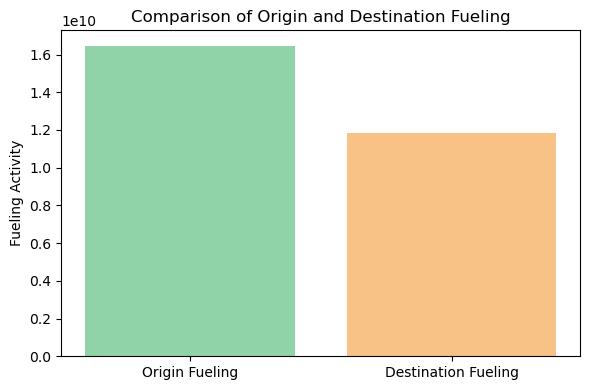

In [262]:
origin_fueling, destination_fueling = get_fueling_activity(filtering_od_ids=True, selected_od_pairs=commuting_ids)

fig, ax = plt.subplots(figsize=(6, 4))

# Data for the bar plot
labels = ['Origin Fueling', 'Destination Fueling']
values = [origin_fueling, destination_fueling]

# Plotting
ax.bar(labels, values, color=['#76c893', '#f7b267'], alpha=0.8)

# Adding labels and title
ax.set_ylabel('Fueling Activity')
ax.set_title('Comparison of Origin and Destination Fueling')

# Display the plot
plt.tight_layout()
plt.show()

12 145
12 146
12 147
12 148
12 149
12 60
12 61
12 62
12 63
12 64
13 130
13 131
13 132
13 133
13 134
13 22
13 23
13 24
13 25
13 26
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85


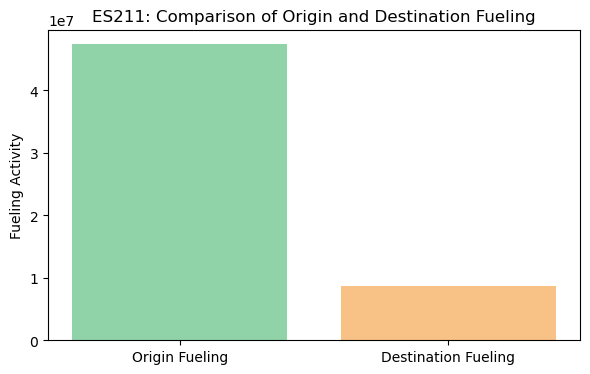

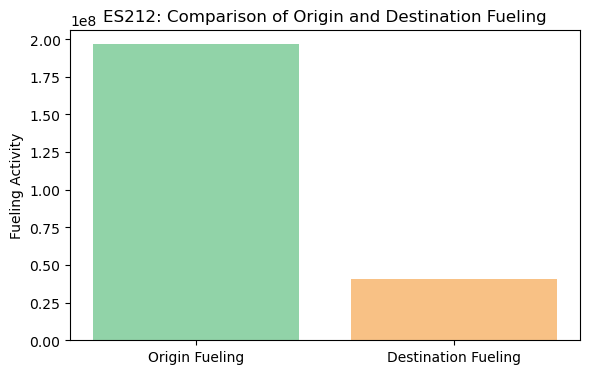

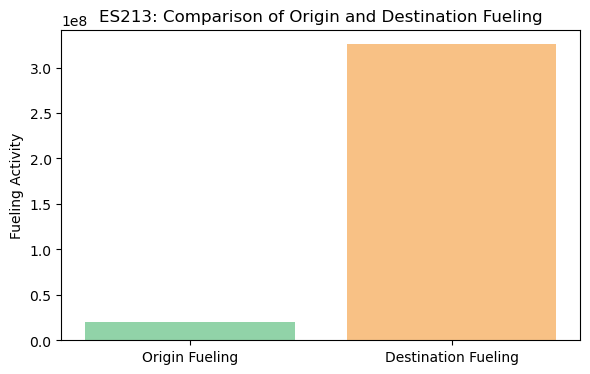

In [263]:
origin_list = [12, 13, 14]


for o in origin_list:
    origin_fueling, destination_fueling = get_fueling_activity(filtering_od_ids=True, selected_od_pairs=commuting_ids, by_origin=True, origin=o, by_fuel=True, fuel="electricity")

    fig, ax = plt.subplots(figsize=(6, 4))

    # Data for the bar plot
    labels = ['Origin Fueling', 'Destination Fueling']
    values = [origin_fueling, destination_fueling]

    # Plotting
    ax.bar(labels, values, color=['#76c893', '#f7b267'], alpha=0.8)

    # Adding labels and title
    ax.set_ylabel('Fueling Activity')
    ax.set_title(geometric_element_list_dict[o]["name"] + ': Comparison of Origin and Destination Fueling')

    # Display the plot
    plt.tight_layout()

plt.show()

# FIGURE 1 for results: 
    - filter for each connection 
    - calculate electrification rate

In [273]:
def get_electrification_rate(by_income_class = False, income_class=None, select_by_od_pair=False, selected_od_pair=[]):
    elec_by_year = {}


    f_elec = "electricity"
    for y in range(y_init, Y_end + 1):
        if not by_income_class and not select_by_od_pair:
            total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list_dict.keys() if (y, r, tv_id, g) in h.keys())
            veh_elec = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list_dict.keys() if (y, r, tv_id, g) in h.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == f_elec)
        elif select_by_od_pair and not by_income_class:
            total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair for tv_id in techvehicle_list_dict.keys() if (y, r, tv_id, g) in h.keys())
            veh_elec = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair for tv_id in techvehicle_list_dict.keys() if (y, r, tv_id, g) in h.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == f_elec)
        elif by_income_class and not select_by_od_pair:
            total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list_dict.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            veh_elec = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list_dict.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == f_elec)
        else:
            total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair for tv_id in techvehicle_list_dict.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            veh_elec = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in selected_od_pair for tv_id in techvehicle_list_dict.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == f_elec)
        if total_veh_number > 0:
            elec_by_year[y] = veh_elec / total_veh_number * 100
            # elec_by_year[y] = veh_elec
        else:
            elec_by_year[y] = 0
    return elec_by_year

In [274]:
connections_not_connected_to_12 = [(13, 12), (13, 12)]
connections_connected_to_12 = [(13, 14), (12, 14)]
connections_from_12 = [(14, 13), (14, 12)]

od_ids_0 = []
for r0 in connections_connected_to_12:
    selec_od = [odpair_list_dict[r]["id"] for r in odpair_list_dict.keys() if odpair_list_dict[r]["from"] == r0[0] and odpair_list[r]["to"] == r0[1] and r in commuting_ids]
    od_ids_0 = od_ids_0 + selec_od
print(od_ids_0)

od_ids_1 = []
for r1 in connections_not_connected_to_12:
    selec_od = [odpair_list_dict[r]["id"] for r in odpair_list_dict.keys() if odpair_list_dict[r]["from"] == r1[0] and odpair_list[r]["to"] == r1[1] and r in commuting_ids]
    od_ids_1 = od_ids_1 + selec_od
print(od_ids_1)

od_ids_2 = []
for r2 in connections_from_12:
    selec_od = [odpair_list_dict[r]["id"] for r in odpair_list_dict.keys() if odpair_list_dict[r]["from"] == r2[0] and odpair_list[r]["to"] == r2[1] and r in commuting_ids]
    od_ids_2 = od_ids_2 + selec_od
print(od_ids_2)
elec_rates_0 = get_electrification_rate(select_by_od_pair=True, selected_od_pair=od_ids_0)
elec_rates_1 = get_electrification_rate(select_by_od_pair=True, selected_od_pair=od_ids_1)
elec_rates_2 = get_electrification_rate(select_by_od_pair=True, selected_od_pair=od_ids_2)

print(elec_rates_0)
print(elec_rates_1)
print(elec_rates_2)

[130, 131, 132, 133, 134, 145, 146, 147, 148, 149]
[22, 23, 24, 25, 26, 22, 23, 24, 25, 26]
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
{2020: 0.9593849097473937, 2021: 0.9104819688698517, 2022: 0.8778800082304805, 2023: 0.8371275575362649, 2024: 0.7963751068058207, 2025: 0.7540957287919414, 2026: 0.7004882012137323, 2027: 0.6616959949624567, 2028: 0.6175389091067857, 2029: 0.574392896712296, 2030: 0.5312468843068443, 2031: 0.5027511200239363, 2032: 0.4732442822798678, 2033: 0.4437374445449554, 2034: 0.41423060680027807, 2035: 0.38472376904766226, 2036: 0.3429396107108654, 2037: 0.301155452372344, 2038: 0.2593712940213945, 2039: 0.21758713567665913, 2040: 5.212147455939146, 2041: 10.081843766039615, 2042: 14.829797673845357, 2043: 19.459052734497646, 2044: 23.97257641622919, 2045: 28.373262008041632, 2046: 29.231394925406406, 2047: 30.068074519055116, 2048: 30.774739385214573, 2049: 29.76673548546503, 2050: 30.542219810356876}
{2020: 0.9585897811922995, 2021: 0.909753186713142, 2022: 0.87

In [275]:
print(techvehicle_list_dict.keys())
print(technology_list_dict.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])
dict_keys([1, 2, 3, 4])


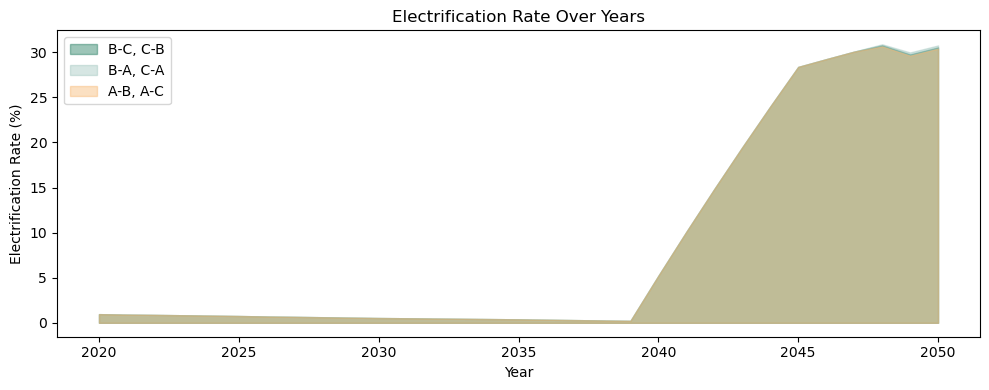

In [276]:
fig, ax = plt.subplots(figsize=(10, 4))

# Extract years and values from the dictionaries
years_0 = list(elec_rates_0.keys())
values_0 = list(elec_rates_0.values())

years_1 = list(elec_rates_1.keys())
values_1 = list(elec_rates_1.values())

years_2 = list(elec_rates_2.keys())
values_2 = list(elec_rates_2.values())
# Plot filled areas
ax.fill_between(years_0, values_0, color="#0b6e4f", alpha=0.4, label="B-C, C-B")
ax.fill_between(years_1, values_1, color="#99c1b9", alpha=0.4, label="B-A, C-A")
ax.fill_between(years_2, values_2, color="#f7b267", alpha=0.4, label="A-B, A-C")

# Add labels, legend, and title
ax.set_xlabel("Year")
ax.set_ylabel("Electrification Rate (%)")
ax.set_title("Electrification Rate Over Years")
ax.legend(loc="upper left")

# Display the plot
plt.tight_layout()
plt.show()

In [277]:
# print distance between those paths
for r in od_ids_0:
    print(path_list_dict[odpair_list_dict[r]["path_id"]]["length"])

print("#############################")
# print distance between those paths
for r in od_ids_1:
    print(path_list_dict[odpair_list_dict[r]["path_id"]]["length"])
print("#############################")

# print distance between those paths
for r in od_ids_2:
    print(path_list_dict[odpair_list_dict[r]["path_id"]]["length"])

388.0
388.0
388.0
388.0
388.0
252.0
252.0
252.0
252.0
252.0
#############################
396.0
396.0
396.0
396.0
396.0
396.0
396.0
396.0
396.0
396.0
#############################
388.0
388.0
388.0
388.0
388.0
252.0
252.0
252.0
252.0
252.0


# FIGURE 2: 
- adding infrastructure in the background of ES211 check
- adding s_fuel origin=ES211 and s_fuel of the others 

In [278]:
product_list = input_data["Product"]
odpair_list = input_data["Odpair"]
path_list = input_data["Path"]
techvehicle_list = input_data["TechVehicle"]
fuel_list = input_data["Fuel"]
geometric_element_list = input_data["GeographicElement"]
technology_list = input_data["Technology"]
mode_list = input_data["Mode"]
financial_status = input_data["FinancialStatus"]
speed_list = input_data["Speed"]
vehicle_list = input_data["Vehicletype"]

odpair_list_dict = {item["id"]: item for item in odpair_list}
techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
product_list_dict = {item["id"]: item for item in product_list}
path_list_dict = {item["id"]: item for item in path_list}
fuel_list_dict = {item["id"]: item for item in fuel_list}
geometric_element_list_dict = {item["id"]: item for item in geometric_element_list}
technology_list_dict = {item["id"]: item for item in technology_list}
mode_list_dict = {item["id"]: item for item in mode_list}
financial_status_dict = {item["id"]: item for item in financial_status}
speed_list_dict = {item["region_type"]: item for item in speed_list}
vehicle_list_dict = {item["name"]: item for item in vehicle_list}

def get_fueling_activity_by_year(filtering_od_ids=False, selected_od_pairs=[], by_origin=False, origin=None, by_fuel=False, fuel=None):
    
    if filtering_od_ids:
        od_pair_ids = selected_od_pairs
    else:
        od_pair_ids = list(odpair_list.keys())

    origin_fueling = {}
    destination_fueling = {}
    intermediate_fueling = {}

    for y in range(y_init, Y_end + 1):
        origin_fueling[y] = 0
        intermediate_fueling[y] = 0
        destination_fueling[y] = 0
        for r in od_pair_ids:

            orig = odpair_list_dict[r]["from"]
            if by_origin:
                if orig != origin:
                    continue
            dest = odpair_list_dict[r]["to"]
            path_sequence = path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"]
            if by_fuel:
                orig_fueling= sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id) in s.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel)
                dest_fueling = sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id) in s.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel)
                for item in path_sequence:
                    if item != orig and item != dest:
                        intermediate_fueling[y] += sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], item), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], item), tv_id) in s.keys() and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel)
            else:
                orig_fueling= sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], orig), tv_id) in s.keys())
                dest_fueling = sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], dest), tv_id) in s.keys())
                for item in path_sequence:
                    if item != orig and item != dest:
                        intermediate_fueling[y] += sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], item), tv_id)] for tv_id in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], item), tv_id) in s.keys())

            origin_fueling[y] += orig_fueling
            destination_fueling[y] += dest_fueling
    return origin_fueling, destination_fueling, intermediate_fueling

{2020: 1221604.7919550003, 2021: 1159286.1694719999, 2022: 1117740.42116, 2023: 1065808.2357550003, 2024: 1013876.0503550001, 2025: 955419.051913, 2026: 887188.1498689998, 2027: 828651.2557629999, 2028: 774002.6175829999, 2029: 723668.345581, 2030: 0.0, 2031: 0.0, 2032: 0.0, 2033: 0.0, 2034: 0.0, 2035: 0.0, 2036: 0.0, 2037: 0.0, 2038: 0.0, 2039: 0.0, 2040: 0.0, 2041: 0.0, 2042: 0.0, 2043: 0.0, 2044: 0.0, 2045: 0.0, 2046: 0.0, 2047: 0.0, 2048: 0.0, 2049: 0.0, 2050: 24846562.136864997}
{2020: 1180325.362535, 2021: 1120084.027469, 2022: 1079923.137425, 2023: 1029722.0248750001, 2024: 979520.9123200001, 2025: 929319.7997650001, 2026: 863325.976471, 2027: 819330.094275, 2028: 764335.24153, 2029: 709340.38879, 2030: 1327679.609628, 2031: 1258223.6406399999, 2032: 1184453.30548, 2033: 1110682.9703200003, 2034: 1036912.6351599998, 2035: 963142.2999999999, 2036: 858612.1319499997, 2037: 754081.96391, 2038: 649551.7958500001, 2039: 545021.6278000001, 2040: 8962815.072092999, 2041: 17102762.32448

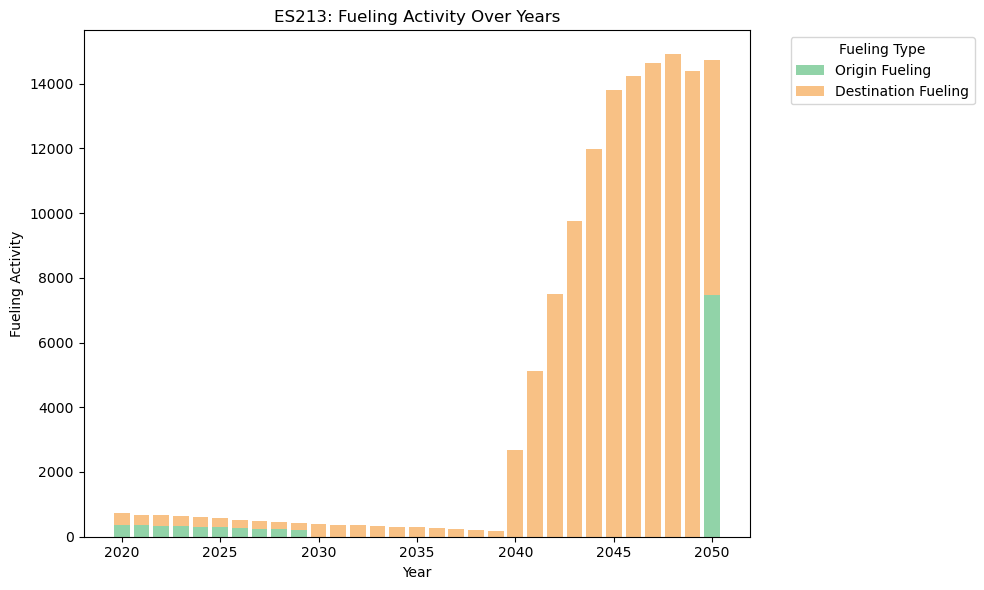

In [282]:
# for each geom_item
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

fuel_list = input_data["Fuel"]
fuel_list = {item["id"]: item for item in fuel_list}

def get_fuel_infr_plus(by_geographic_element = False, geographic_element=[]):
    q_plus_by_tech = {}

    if not by_geographic_element:
        geographic_element = geographic_element_list.keys()
    
    for f in fuel_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y0, f, e)] for y0 in range(y_init, y+1) for e in geographic_element if (y0, f, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, f)] = total_expansion_per_y
    return q_plus_by_tech
geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}
e = 14   #ES211
# for e in geographic_element_list.keys():
    
q_plus_by_tech = get_fuel_infr_plus(True, [e])

## finding usage of commuters that arrive there
gamma = input_data["Model"]["gamma"]
origin_fueling, destination_fueling, intermediate_fueling = get_fueling_activity_by_year(filtering_od_ids=True, selected_od_pairs=od_ids_1 + od_ids_2, by_fuel=True, fuel="electricity")
print(origin_fueling)
print(destination_fueling)

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)

# Prepare data for origin, destination, and intermediate fueling
origin_fueling_values = [origin_fueling.get(year, 0) * gamma for year in years]
destination_fueling_values = [destination_fueling.get(year, 0) * gamma for year in years]
intermediate_fueling_values = [intermediate_fueling.get(year, 0) * gamma for year in years]

# Plotting stacked bars
ax.bar(years, origin_fueling_values, label="Origin Fueling", color="#76c893", alpha=0.8)
ax.bar(years, destination_fueling_values, bottom=origin_fueling_values, label="Destination Fueling", color="#f7b267", alpha=0.8)
# ax.bar(years, intermediate_fueling_values, bottom=[o + d for o, d in zip(origin_fueling_values, destination_fueling_values)], label="Intermediate Fueling", color="#4f5d75", alpha=0.8)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Fueling Activity')
ax.set_title(str(geographic_element_list[e]["name"]) + ': Fueling Activity Over Years')
ax.legend(title='Fueling Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
